In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)



In [10]:
df=pd.read_csv('song_data_final.csv',index_col=0)

In [12]:
#target variable is popularity score
target=df['Popularity']

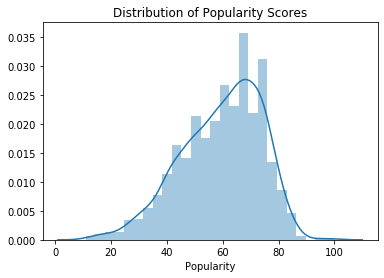

In [15]:
#distribution plot of target variable
#normal distribution, slightly left skewed 
sns.distplot(target)
plt.title('Distribution of Popularity Scores')

plt.show()

In [139]:
sns.pairplot(df)

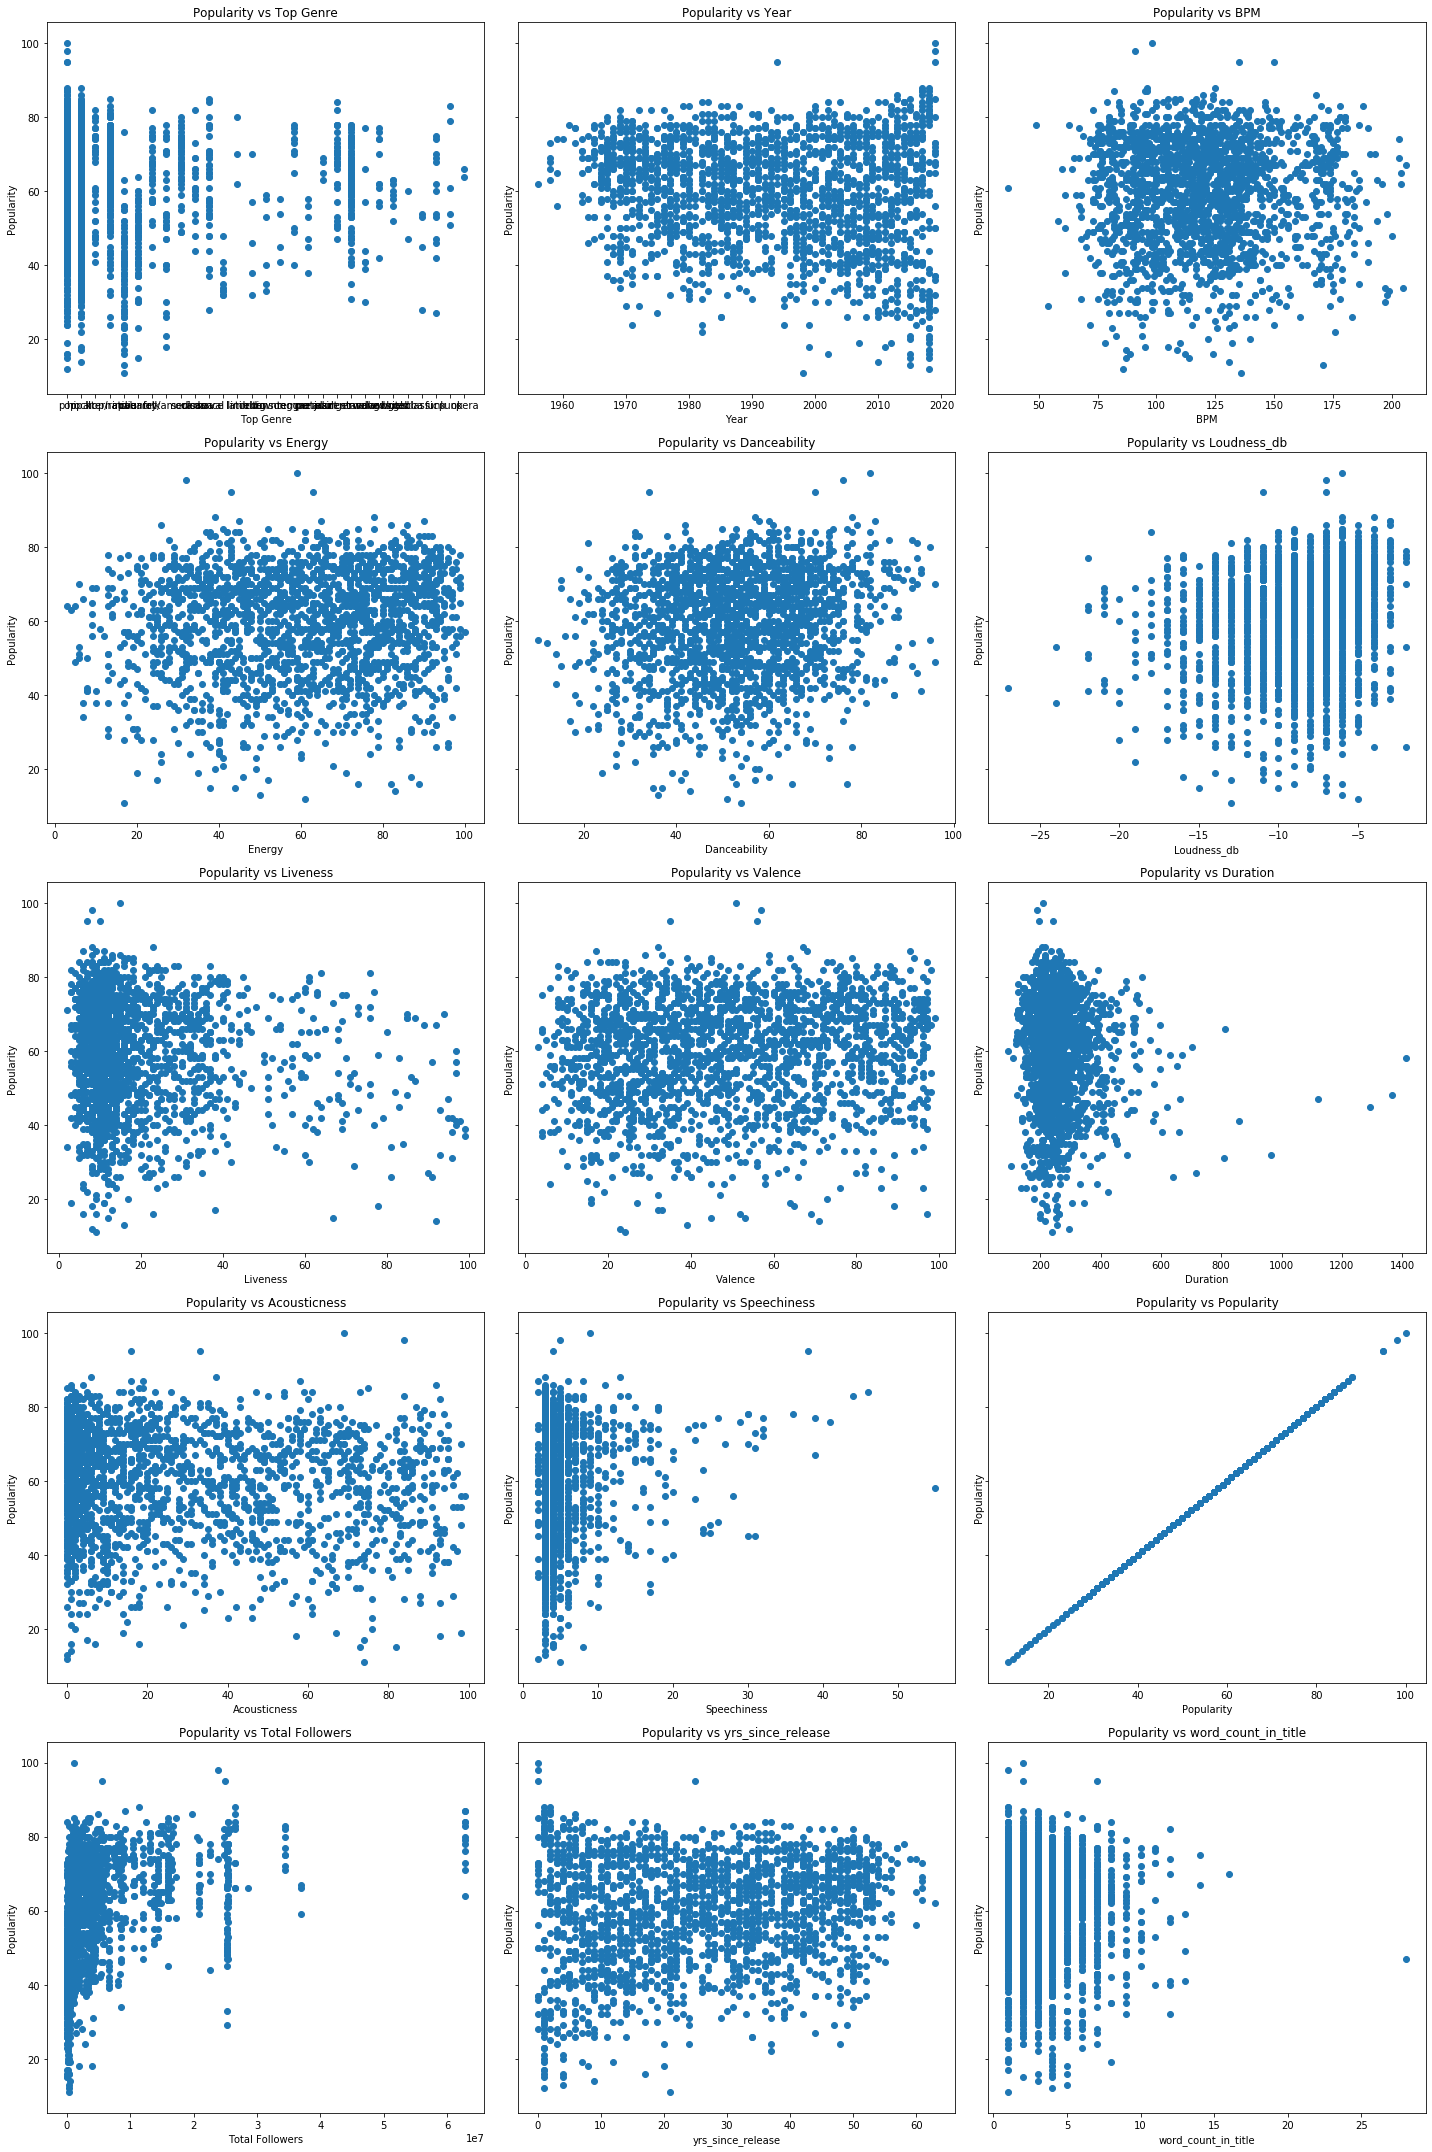

In [62]:
#scatterplots for all x and y relationships (genres not split out)
#mostly non-linear

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,30), sharey=True)

for ax, column in zip(axes.flatten(), df.columns[2:17]):
    ax.scatter(df[column], df['Popularity'], label=column, alpha=1)
    ax.set_title(f'Popularity vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Popularity')

fig.tight_layout()


In [61]:
df.columns[2:17]

Index(['Top Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'Loudness_db',
       'Liveness', 'Valence', 'Duration', 'Acousticness', 'Speechiness',
       'Popularity', 'Total Followers', 'yrs_since_release',
       'word_count_in_title'],
      dtype='object')

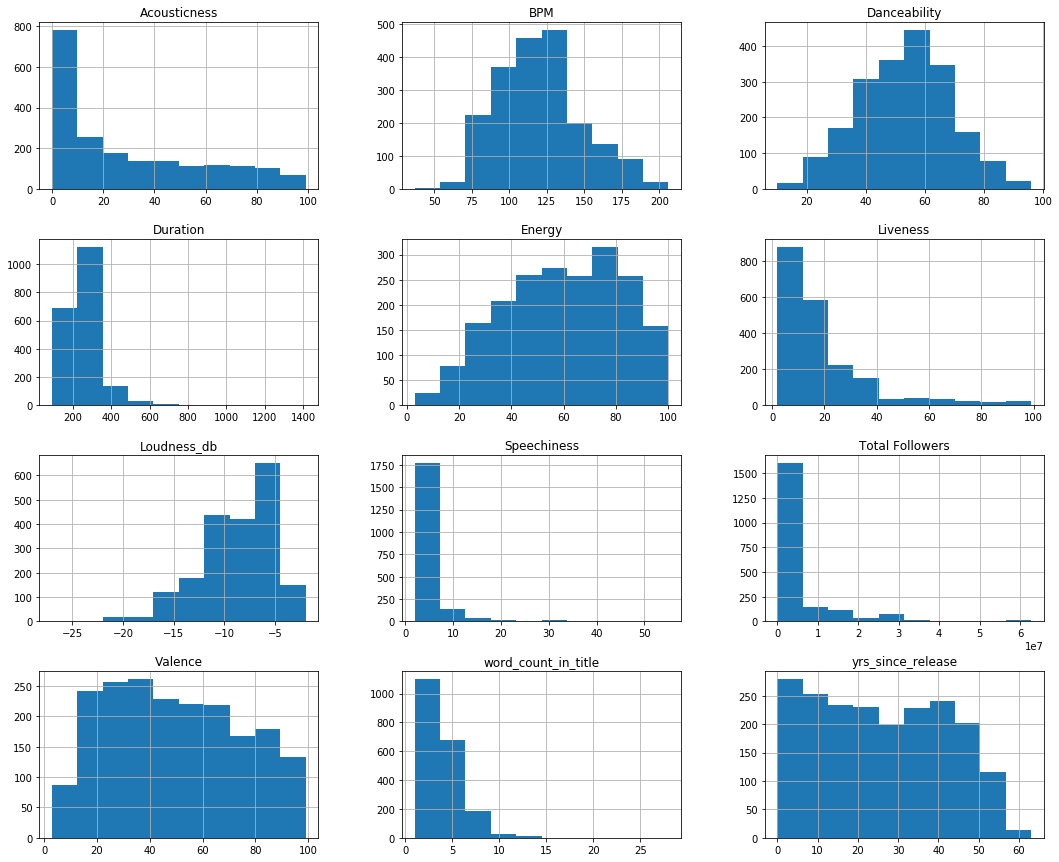

In [101]:
#histogram for all features except genre dummies
df[['BPM', 'Energy', 'Danceability', 'Loudness_db',
       'Liveness', 'Valence', 'Duration', 'Acousticness', 'Speechiness',
        'Total Followers', 'yrs_since_release',
       'word_count_in_title']].hist(figsize=(18,15))

plt.show()

In [107]:
#df2, dropping categoricals and setting up new df to test scaled values
df2=df.drop(columns=['Title','Artist','Year','Top Genre'])

In [111]:
features=['BPM', 'Energy', 'Danceability', 'Loudness_db', 'Liveness', 'Valence',
       'Duration', 'Acousticness', 'Speechiness', 'Total Followers',
       'yrs_since_release', 'word_count_in_title', 'Genre_adult standards',
       'Genre_alternative', 'Genre_blues', 'Genre_cabaret',
       'Genre_carnaval limburg', 'Genre_celtic', 'Genre_chanson',
       'Genre_classic', 'Genre_country/americana', 'Genre_dance',
       'Genre_disco', 'Genre_downtempo', 'Genre_folk', 'Genre_funk',
       'Genre_gabba', 'Genre_hip hop/rap', 'Genre_indie', 'Genre_jazz',
       'Genre_latin', 'Genre_mellow gold', 'Genre_metal', 'Genre_opera',
       'Genre_pop', 'Genre_punk', 'Genre_reggae', 'Genre_rock',
       'Genre_singer-songwriter', 'Genre_soul']

In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()


In [113]:
features_scaled=[]
for var in features:
    new_col = var +"_scaled"
    df2[new_col] = scaler.fit_transform(df[[var]])
    features_scaled.append(new_col)

In [140]:
#features_scaled

In [141]:
#df2[['BPM_scaled','Energy_scaled',
 'Danceability_scaled',
 'Loudness_db_scaled',
 'Liveness_scaled',
 'Valence_scaled',
 'Duration_scaled',
 'Acousticness_scaled',
 'Speechiness_scaled',
 'Total Followers_scaled',
 'yrs_since_release_scaled',
 'word_count_in_title_scaled',
 'Genre_adult standards_scaled',
 'Genre_alternative_scaled',
 'Genre_blues_scaled']].hist(figsize=(18,15))

plt.show()

IndentationError: unexpected indent (<ipython-input-141-3286383cefa0>, line 2)

In [123]:
#df3 , dropping categoricals and scaled values 
#correlation analysis/testing
df3=df.drop(columns=['Title','Artist','Top Genre','Year'])

In [124]:
corr=df3.corr()

In [159]:
corr

BPM    Energy  Danceability  Loudness_db  \
BPM                      1.000000  0.155437     -0.142008     0.091063   
Energy                   0.155437  1.000000      0.140519     0.735899   
Danceability            -0.142008  0.140519      1.000000     0.045922   
Loudness_db              0.091063  0.735899      0.045922     1.000000   
Liveness                 0.015976  0.174229     -0.102697     0.098452   
Valence                  0.059158  0.405303      0.514556     0.147376   
Duration                 0.008022  0.021607     -0.137026    -0.057941   
Acousticness            -0.120712 -0.665438     -0.137172    -0.452560   
Speechiness              0.085123  0.206048      0.125534     0.125403   
Popularity              -0.004635  0.104241      0.145635     0.166836   
Total Followers         -0.069765  0.058256      0.062953     0.195424   
yrs_since_release       -0.011173 -0.147997     -0.078809    -0.344729   
word_count_in_title     -0.027006  0.019736     -0.025032    -0.032545   
Genre_adult standards   -0.033170 -0.189693     -0.085609    -0.180936   
Genre_alternative        0.015995  0.176292     -0.108869     0.174842   
Genre_blues             -0.016387 -0.000477      0.048140    -0.032391   
Genre_cabaret           -0.011788 -0.077253     -0.001227    -0.074779   
Genre_carnaval limburg   0.084201 -0.016235     -0.083305     0.004124   
Genre_celtic             0.014588 -0.058535     -0.040553    -0.093234   
Genre_chanson           -0.024959 -0.020250     -0.066370    -0.009852   
Genre_classic           -0.025165 -0.037772     -0.031301    -0.042840   
Genre_country/americana -0.058354 -0.064707      0.022067    -0.018779   
Genre_dance              0.050500  0.106045      0.077573     0.044434   
Genre_disco             -0.001953  0.048342      0.107343    -0.012759   
Genre_downtempo         -0.038754 -0.003373     -0.010140    -0.002923   
Genre_folk              -0.005458 -0.070791     -0.030554    -0.050186   
Genre_funk               0.007971  0.017531      0.046282    -0.006561   
Genre_gabba              0.056223  0.050531      0.001601     0.030486   
Genre_hip hop/rap       -0.024570  0.041483      0.175565     0.076813   
Genre_indie             -0.017959 -0.026677      0.001530     0.002809   
Genre_jazz               0.028792 -0.002867      0.019047    -0.009064   
Genre_latin              0.079489  0.016936      0.014596     0.028485   
Genre_mellow gold        0.000568  0.028013      0.031973     0.046617   
Genre_metal             -0.028551  0.030581     -0.043719     0.047839   
Genre_opera              0.017242 -0.025981     -0.030373     0.017465   
Genre_pop               -0.007237 -0.040733      0.092282     0.072449   
Genre_punk               0.008152  0.034246     -0.058179     0.030383   
Genre_reggae            -0.020553 -0.023413      0.136480    -0.022836   
Genre_rock               0.022818  0.053716     -0.068324    -0.077836   
Genre_singer-songwriter -0.009032 -0.008355     -0.002475     0.008903   
Genre_soul              -0.024709 -0.036240      0.047567     0.044463   

                         Liveness   Valence  Duration  Acousticness  \
BPM                      0.015976  0.059158  0.008022     -0.120712   
Energy                   0.174229  0.405303  0.021607     -0.665438   
Danceability            -0.102697  0.514556 -0.137026     -0.137172   
Loudness_db              0.098452  0.147376 -0.057941     -0.452560   
Liveness                 1.000000  0.050737  0.032164     -0.046433   
Valence                  0.050737  1.000000 -0.203973     -0.239968   
Duration                 0.032164 -0.203973  1.000000     -0.100368   
Acousticness            -0.046433 -0.239968 -0.100368      1.000000   
Speechiness              0.092656  0.107203 -0.028251     -0.098575   
Popularity              -0.111654  0.096250 -0.066938     -0.088924   
Total Followers         -0.008360 -0.072410 -0.003373     -0.055941   
yrs_since_release       -0.019238  0.165665  0.051821      0.134132  

In [127]:
#multicollinearity between loudness and energy
#statistical test 1
#checking correlation
corr[abs(corr>.50)]

BPM    Energy  Danceability  Loudness_db  Liveness  \
BPM                      1.0       NaN           NaN          NaN       NaN   
Energy                   NaN  1.000000           NaN     0.735899       NaN   
Danceability             NaN       NaN      1.000000          NaN       NaN   
Loudness_db              NaN  0.735899           NaN     1.000000       NaN   
Liveness                 NaN       NaN           NaN          NaN       1.0   
Valence                  NaN       NaN      0.514556          NaN       NaN   
Duration                 NaN       NaN           NaN          NaN       NaN   
Acousticness             NaN       NaN           NaN          NaN       NaN   
Speechiness              NaN       NaN           NaN          NaN       NaN   
Popularity               NaN       NaN           NaN          NaN       NaN   
Total Followers          NaN       NaN           NaN          NaN       NaN   
yrs_since_release        NaN       NaN           NaN          NaN       NaN   
word_count_in_title      NaN       NaN           NaN          NaN       NaN   
Genre_adult standards    NaN       NaN           NaN          NaN       NaN   
Genre_alternative        NaN       NaN           NaN          NaN       NaN   
Genre_blues              NaN       NaN           NaN          NaN       NaN   
Genre_cabaret            NaN       NaN           NaN          NaN       NaN   
Genre_carnaval limburg   NaN       NaN           NaN          NaN       NaN   
Genre_celtic             NaN       NaN           NaN          NaN       NaN   
Genre_chanson            NaN       NaN           NaN          NaN       NaN   
Genre_classic            NaN       NaN           NaN          NaN       NaN   
Genre_country/americana  NaN       NaN           NaN          NaN       NaN   
Genre_dance              NaN       NaN           NaN          NaN       NaN   
Genre_disco              NaN       NaN           NaN          NaN       NaN   
Genre_downtempo          NaN       NaN           NaN          NaN       NaN   
Genre_folk               NaN       NaN           NaN          NaN       NaN   
Genre_funk               NaN       NaN           NaN          NaN       NaN   
Genre_gabba              NaN       NaN           NaN          NaN       NaN   
Genre_hip hop/rap        NaN       NaN           NaN          NaN       NaN   
Genre_indie              NaN       NaN           NaN          NaN       NaN   
Genre_jazz               NaN       NaN           NaN          NaN       NaN   
Genre_latin              NaN       NaN           NaN          NaN       NaN   
Genre_mellow gold        NaN       NaN           NaN          NaN       NaN   
Genre_metal              NaN       NaN           NaN          NaN       NaN   
Genre_opera              NaN       NaN           NaN          NaN       NaN   
Genre_pop                NaN       NaN           NaN          NaN       NaN   
Genre_punk               NaN       NaN           NaN          NaN       NaN   
Genre_reggae             NaN       NaN           NaN          NaN       NaN   
Genre_rock               NaN       NaN           NaN          NaN       NaN   
Genre_singer-songwriter  NaN       NaN           NaN          NaN       NaN   
Genre_soul               NaN       NaN           NaN          NaN       NaN   

                          Valence  Duration  Acousticness  Speechiness  \
BPM                           NaN       NaN           NaN          NaN   
Energy                        NaN       NaN           NaN          NaN   
Danceability             0.514556       NaN           NaN          NaN   
Loudness_db                   NaN       NaN           NaN          NaN   
Liveness                      NaN       NaN           NaN          NaN   
Valence                  1.000000       NaN           NaN          NaN   
Duration                      NaN       1.0           NaN          NaN   
Acousticness                  NaN       NaN           1.0          NaN   
Speechiness                   NaN       

In [132]:
#total followers has highest correlation with popularity
corr['Popularity'].sort_values(ascending=False)

Popularity                 1.000000
Total Followers            0.334425
Loudness_db                0.166836
yrs_since_release          0.157486
Danceability               0.145635
Speechiness                0.111980
Genre_alternative          0.108686
Energy                     0.104241
Valence                    0.096250
Genre_soul                 0.090088
Genre_rock                 0.062635
Genre_hip hop/rap          0.054523
Genre_adult standards      0.045496
Genre_folk                 0.042441
Genre_reggae               0.037404
Genre_latin                0.030150
Genre_mellow gold          0.026568
Genre_punk                 0.021250
Genre_jazz                 0.021032
word_count_in_title        0.016657
Genre_disco                0.014305
Genre_dance                0.013337
Genre_opera                0.012105
Genre_blues               -0.001723
BPM                       -0.004635
Genre_funk                -0.011585
Genre_gabba               -0.013274
Genre_pop                 -0

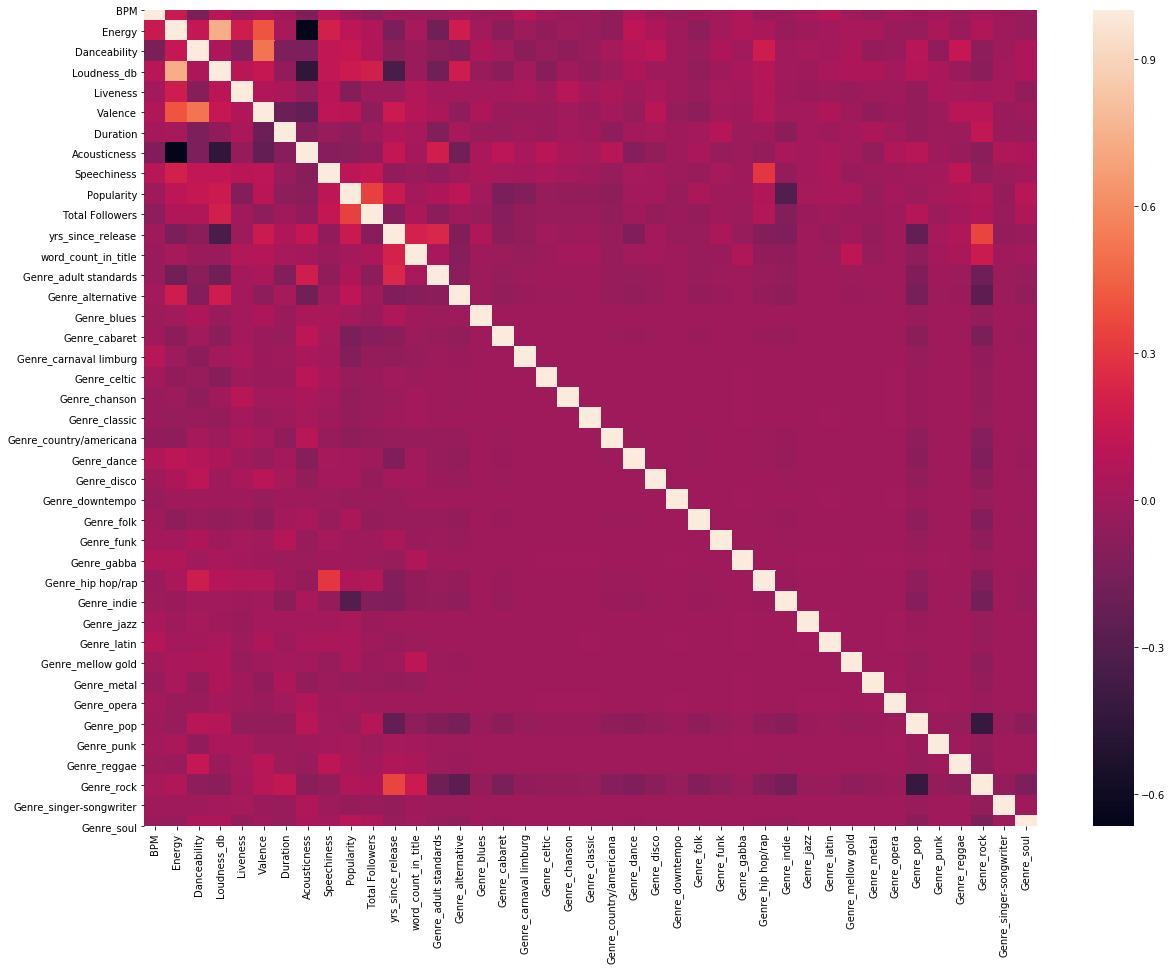

In [177]:
fig,ax=plt.subplots(figsize=(20,15))

sns.heatmap(corr)

In [144]:
df3

BPM  Energy  Danceability  Loudness_db  Liveness  Valence  Duration  \
0     157      30            53          -14        11       68       201   
1     135      79            50          -11        17       81       207   
2     168      69            66           -9         7       52       341   
3     173      96            43           -4         3       37       269   
4     106      82            58           -5        10       87       256   
...   ...     ...           ...          ...       ...      ...       ...   
1990   94      21            70          -12        11       72       128   
1991  175      76            36           -8        76       95       136   
1992  168      80            53           -9        31       97       162   
1993  174      26            45          -13         7       60       324   
1994  133      50            49          -10        16       83       148   

      Acousticness  Speechiness  Popularity  Total Followers  \
0               94            3          71          2152743   
1               17            7          39          3080343   
2                2           17          69          5402898   
3                0            4          76          7461956   
4                1            3          59          3079845   
...            ...          ...         ...              ...   
1990            84            7          63          4126195   
1991            73            6          69          4126195   
1992            74            7          74          1102795   
1993            54            4          65           136077   
1994            74            3          56           283220   

      yrs_since_release  word_count_in_title  Genre_adult standards  \
0                    15                    1                      0   
1                    19                    2                      0   
2                    18                    2                      0   
3                    12                    2                      0   
4                    17                    5                      0   
...                 ...                  ...                    ...   
1990                 61                    2                      1   
1991                 61                    2                      1   
1992                 60                    3                      0   
1993                 60                    2                      0   
1994                 60                    2                      1   

      Genre_alternative  Genre_blues  Genre_cabaret  Genre_carnaval limburg  \
0                     0            0              0                       0   
1                     0            0              0                       0   
2                     0            0              0                       0   
3                     1            0              0                       0   
4                     0            0              0                       0   
...                 ...          ...            ...                     ...   
1990                  0            0              0                       0   
1991                  0            0              0                       0   
1992                  0            0              0                       0   
1993                  0            0              0                       0   
1994                  0            0              0                       0   

      Genre_celtic  Genre_chanson  Genre_classic  Genre_country/americana  \
0                0              0              0                        0   
1                0              0              0                        0   
2                0              0              0                        0   
3                0              0              0                        0   
4                0              0              0                        0   
...            ...            ...            ...

In [179]:
#Statistical Test 2 - statistical significance between avg popularity for metal and rock songs
#the avg popularity of both genres is different 
stats.ttest_ind(df[df['Top Genre']=='rock']['Popularity'],df[df['Top Genre']=='alternative']['Popularity'])


Ttest_indResult(statistic=-3.6624778368437463, pvalue=0.000262775550119648)

In [180]:
#Statistical Test 3 - ANOVA 
#these genres are not statistically different in reference to popularity
pop_popularity=df[df['Top Genre']=='pop']['Popularity']
dance_popularity=df[df['Top Genre']=='dance']['Popularity']
disco_popularity=df[df['Top Genre']=='disco']['Popularity']
stat,pval = stats.f_oneway(pop_popularity,dance_popularity,disco_popularity)
stat,pval

(0.47549761031567406, 0.621881510819406)

In [158]:
df3

BPM  Energy  Danceability  Loudness_db  Liveness  Valence  Duration  \
0     157      30            53          -14        11       68       201   
1     135      79            50          -11        17       81       207   
2     168      69            66           -9         7       52       341   
3     173      96            43           -4         3       37       269   
4     106      82            58           -5        10       87       256   
...   ...     ...           ...          ...       ...      ...       ...   
1990   94      21            70          -12        11       72       128   
1991  175      76            36           -8        76       95       136   
1992  168      80            53           -9        31       97       162   
1993  174      26            45          -13         7       60       324   
1994  133      50            49          -10        16       83       148   

      Acousticness  Speechiness  Popularity  Total Followers  \
0               94            3          71          2152743   
1               17            7          39          3080343   
2                2           17          69          5402898   
3                0            4          76          7461956   
4                1            3          59          3079845   
...            ...          ...         ...              ...   
1990            84            7          63          4126195   
1991            73            6          69          4126195   
1992            74            7          74          1102795   
1993            54            4          65           136077   
1994            74            3          56           283220   

      yrs_since_release  word_count_in_title  Genre_adult standards  \
0                    15                    1                      0   
1                    19                    2                      0   
2                    18                    2                      0   
3                    12                    2                      0   
4                    17                    5                      0   
...                 ...                  ...                    ...   
1990                 61                    2                      1   
1991                 61                    2                      1   
1992                 60                    3                      0   
1993                 60                    2                      0   
1994                 60                    2                      1   

      Genre_alternative  Genre_blues  Genre_cabaret  Genre_carnaval limburg  \
0                     0            0              0                       0   
1                     0            0              0                       0   
2                     0            0              0                       0   
3                     1            0              0                       0   
4                     0            0              0                       0   
...                 ...          ...            ...                     ...   
1990                  0            0              0                       0   
1991                  0            0              0                       0   
1992                  0            0              0                       0   
1993                  0            0              0                       0   
1994                  0            0              0                       0   

      Genre_celtic  Genre_chanson  Genre_classic  Genre_country/americana  \
0                0              0              0                        0   
1                0              0              0                        0   
2                0              0              0                        0   
3                0              0              0                        0   
4                0              0              0                        0   
...            ...            ...            ...

In [160]:
import pickle


In [161]:
df3.to_pickle('data.pkl')